In [5]:
#
# Last executed on Rokny at 18.03.21.
#

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model
import tensorflow as tf
from sklearn.metrics import roc_auc_score
np.random.seed(100)
tf.random.set_seed(100)

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255
X_test /= 255 

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
input_shape = (32, 32, 3)
def createModel():
    input_img = Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(input_img)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x) 
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)    
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)    
    x = tf.keras.layers.Dropout(0.5)(x)    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)    
    output = tf.keras.layers.Dense(10, activation='softmax', name='visualized_layer')(x)

    def auc(y_true, y_pred):
        return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)
    
    model = Model(inputs=input_img, outputs=output)
    return model

In [11]:
model = createModel()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
size = int(len(X_train) * 0.8)
train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [13]:
with tf.device('/gpu:0'):
    history = model.fit(train_x, train_y, batch_size=128, epochs=100, validation_data=(val_x, val_y))

Epoch 1/100
313/313 [==============================] - 6s 20ms/step - loss: 1.7201 - accuracy: 0.3729 - val_loss: 1.4741 - val_accuracy: 0.4814
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 1.4130 - accuracy: 0.4915 - val_loss: 1.2979 - val_accuracy: 0.5555
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 1.3004 - accuracy: 0.5361 - val_loss: 1.2133 - val_accuracy: 0.5887
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 1.2191 - accuracy: 0.5672 - val_loss: 1.1436 - val_accuracy: 0.6123
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 1.1569 - accuracy: 0.5879 - val_loss: 1.0874 - val_accuracy: 0.6253
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 1.1064 - accuracy: 0.6064 - val_loss: 1.0265 - val_accuracy: 0.6535
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 1.0597 - accuracy: 0.6246 - val_loss: 0.9979 - val_accuracy:

313/313 [==============================] - 5s 17ms/step - loss: 0.4220 - accuracy: 0.8503 - val_loss: 0.8426 - val_accuracy: 0.7302
Epoch 58/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4252 - accuracy: 0.8496 - val_loss: 0.8487 - val_accuracy: 0.7330
Epoch 59/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4132 - accuracy: 0.8522 - val_loss: 0.8460 - val_accuracy: 0.7291
Epoch 60/100
313/313 [==============================] - 6s 18ms/step - loss: 0.4124 - accuracy: 0.8514 - val_loss: 0.8432 - val_accuracy: 0.7317
Epoch 61/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4128 - accuracy: 0.8528 - val_loss: 0.8383 - val_accuracy: 0.7364
Epoch 62/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4087 - accuracy: 0.8559 - val_loss: 0.8452 - val_accuracy: 0.7333
Epoch 63/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4051 - accuracy: 0.8558 - val_loss: 0.8590 - val_accuracy: 0.728

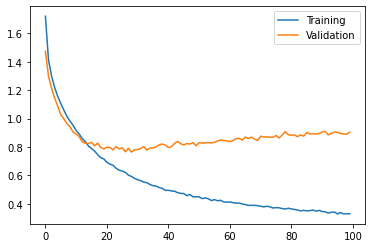

In [14]:
from matplotlib import pyplot
# learning curves of model accuracy
pyplot.plot(history.history['loss'], label='Training')
pyplot.plot(history.history['val_loss'], label='Validation')
pyplot.legend()
pyplot.show()

In [15]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.9528 - accuracy: 0.7262
Test accuracy:  0.7261999845504761
